In [1]:
import pandas as pd

application_train = pd.read_csv('data/application_train.csv')

In [1]:
""" Dont run it, if you won't wait 1.5 hour of generating the report """

# import sweetviz as sv
# # Generate the Sweetviz report
# report = sv.analyze(application_train)
# report.show_html('Home_Credit_EDA.html')

" Dont run it, if you won't wait 1.5 hour of generating the report "

In [2]:
# Separate numerical and categorical columns
numerical_cols = application_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = application_train.select_dtypes(include=['object', 'category']).columns

# Check if there are numerical columns before filling
if not numerical_cols.empty:
    # Fill numerical columns with median
    application_train[numerical_cols] = application_train[numerical_cols].fillna(application_train[numerical_cols].median())

# Check if there are categorical columns before filling
if not categorical_cols.empty:
    # Fill categorical columns with mode
    for col in categorical_cols:
        application_train[col] = application_train[col].fillna(application_train[col].mode()[0])

print(application_train.isnull().sum())

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


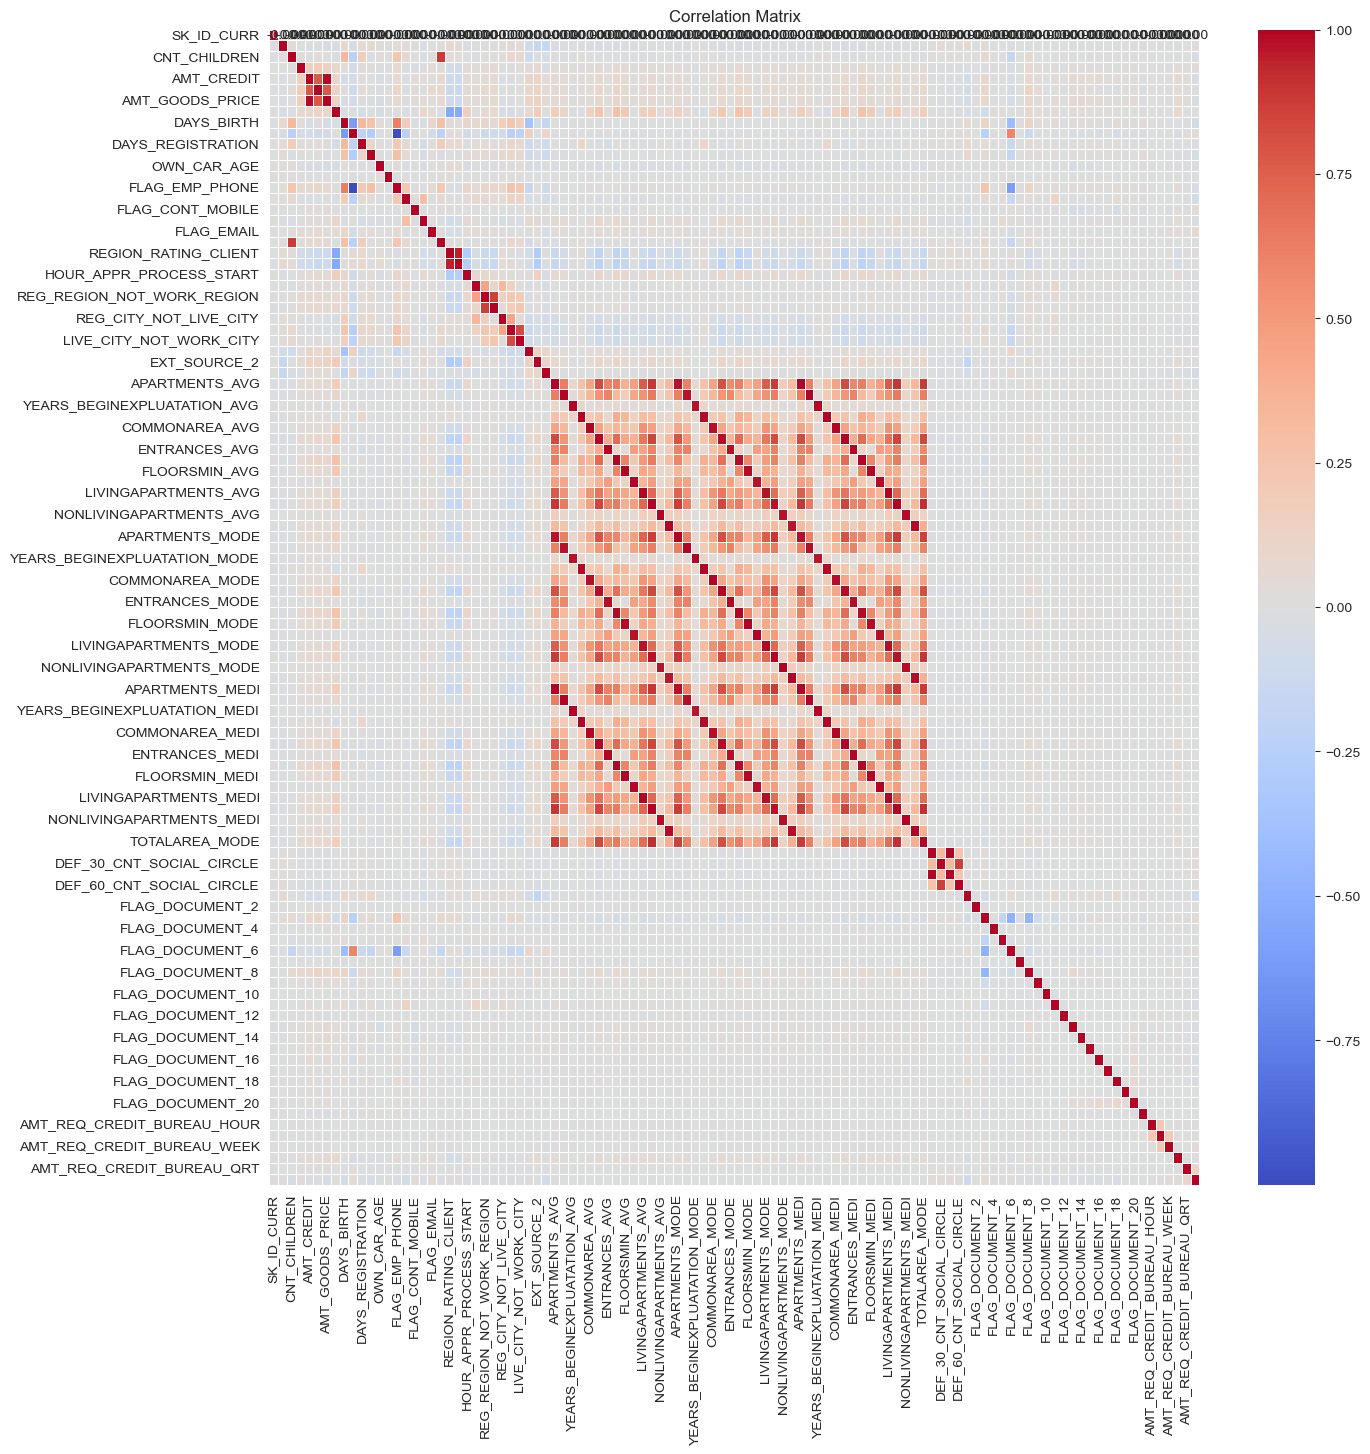

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_data = application_train.select_dtypes(include=['float64', 'int64'])

# Check if numerical_data is not empty
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

# Correlation Matrix Insights

## High Correlation Clusters:

There are distinct clusters of highly correlated variables, such as between AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, and AMT_INCOME_TOTAL, indicating that higher loan amounts are often associated with higher annuity payments and goods prices.

## External Scores:

EXT_SOURCE_2 and EXT_SOURCE_3 have strong correlations with each other and with TARGET, indicating that these external scores are significant predictors of loan defaults.

## Negative Correlations:

Variables like DAYS_BIRTH (client's age) and DAYS_EMPLOYED (length of employment) show negative correlations with TARGET, suggesting older and longer-employed clients tend to have fewer difficulties repaying loans.

## Potential Redundancy:

Variables such as FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, APARTMENTS_AVG, etc., exhibit high inter-correlations, suggesting potential redundancy that could be addressed through dimensionality reduction techniques like PCA (Principal Component Analysis).

## Weak Correlations:

Most other features exhibit weak correlations with TARGET, indicating the need for advanced modeling techniques to capture non-linear relationships and interactions.